
# Clustering Assignment
## Categorise the Countries for Financial Aid by Help International NGO (K-Means & Hierarchial Clustering)

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## Approach
Based on the business problem and looking at the dataset at a high level, I will be following the below approach to solve this problem.

- Check for missing value, and treatment
- Check for outlier and treatment
- Perform the basic EDA to find the variablity and distribution of the data, so as to identify if we need t scaling the data
- Data Scaling if necessary
- Use Hopkins Method to check if the dataset is good enough for a cluster analysis
- Using Hierarchical clustering to identify the optimal cluster value.
- Use Silhouette and Elbow method to validate the optimal cluster values.
- Use K-Means Cluster method to build the final cluster model.
- Analyse the cluster that is representing the countries that will solve the Business Problem.
- Present the final report

## Importing Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from numpy.random import uniform
from math import isnan
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Understanding the data

In [3]:
Country_data = pd.read_csv("Country-data.csv", sep = ',',encoding = "ISO-8859-1", header= 0)
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Shape of the dataframe (Rows & Columns)
Country_data.shape

(167, 10)

In [5]:
# basic information of the dataframe
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Descriptive Statistics
Country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Insight 
- Dataframe has data about various countries and their socio-economic factors. Few are in % and others in absolute values.
- Dataframe has 10 Columns and 167 Rows 
- One variable is 'Object' Type, and rest all are 'Int' or 'Float' type 
- Descriptive Statistics tells us that there is variablity in the data, and will require scaling before model building.

## Missing Values Check

In [7]:
Country_data.isnull().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###### We do no have amy missing values. NO missing value treatment is necessary

## Dropping duplicates (if required)

In [8]:
# Shape before dropping duplicates
Country_data.shape

(167, 10)

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any
Country_data.drop_duplicates(subset=None, inplace=True)

In [10]:
# Shape after dropping duplicates
Country_data.shape

(167, 10)

#### There seems to be No duplicate values in the dataset, since the shape before and after drop duplicate is same.

# Data Transformation

In our dataframe (ngo), the 'imports', 'exports' and 'health' variable seems to be in percentage of GDP per capita, and this can sometimes give a incorrect insight in our EDA. For example, the health spending of 'Afghanistan' is 7.58 and that of 'Albania' is '6.55', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'Afghanistan' and 'Albania' is.  So the best way to tackle it is to convert the % values to Absolute values

In [11]:
#removing country column
data = Country_data.drop('country', axis = 1)

In [12]:
#exports, health and imports are given as % of GDP Percapita.
#Converting percentages to values
data.exports = (data.exports / 100 ) * (data.gdpp)
data.health = (data.health / 100 ) * (data.gdpp)
data.imports = (data.imports / 100 ) * (data.gdpp)

In [13]:
#Validating changes done above
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
# Checking the columns of the dataframe
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

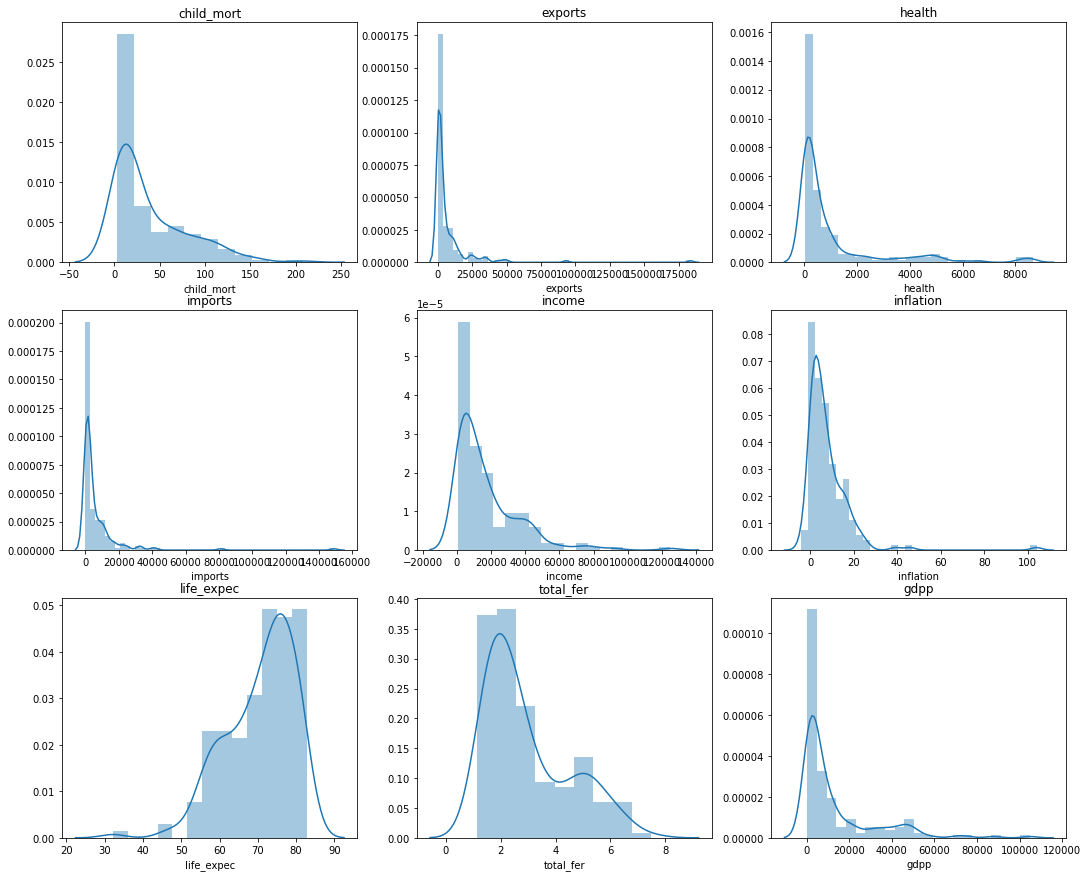

In [15]:
#Plotting all the features to visualise and look their distributions
plt.figure(figsize=(18,15))
features = data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data[i[1]])
    plt.title(str(i[1]))

* We could see that all the varibles have skewness
* All of them are skewed towards right , except **life_expec** (which is left skewed)
* This indicated that there are outliers which needs to be checked

In [16]:
#skewness of each feature before transforming the data
data.skew()

child_mort    1.450774
exports       6.720171
health        2.526029
imports       6.618500
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

### Outlier Analysis
* As we saw in above plots, we have so outliers in allmost all oof the features
* These outliers are acceptable in business point of view , as there are poor countries and highly sophisticated countries
* As we have each row for one country, removing outliers will cause data loss - which is not a feasible solution
* Using **Power transformer** to transform the data to get rid of skewness

In [17]:
# Checking the statistical information again
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_data = pd.DataFrame(pt.fit_transform(data))
transformed_data.columns= data.columns

In [19]:
transformed_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.658719,-1.239313,-1.246055,-1.368935,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.238427,-0.042924,-0.055108,0.012538,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,-0.030785,-0.270052,-0.266188,0.232275,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.100544,-0.661987,-0.219429,-0.408251,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.602677,0.563269,0.758134,0.572583,-0.723442,0.699553,-0.368063,0.609228


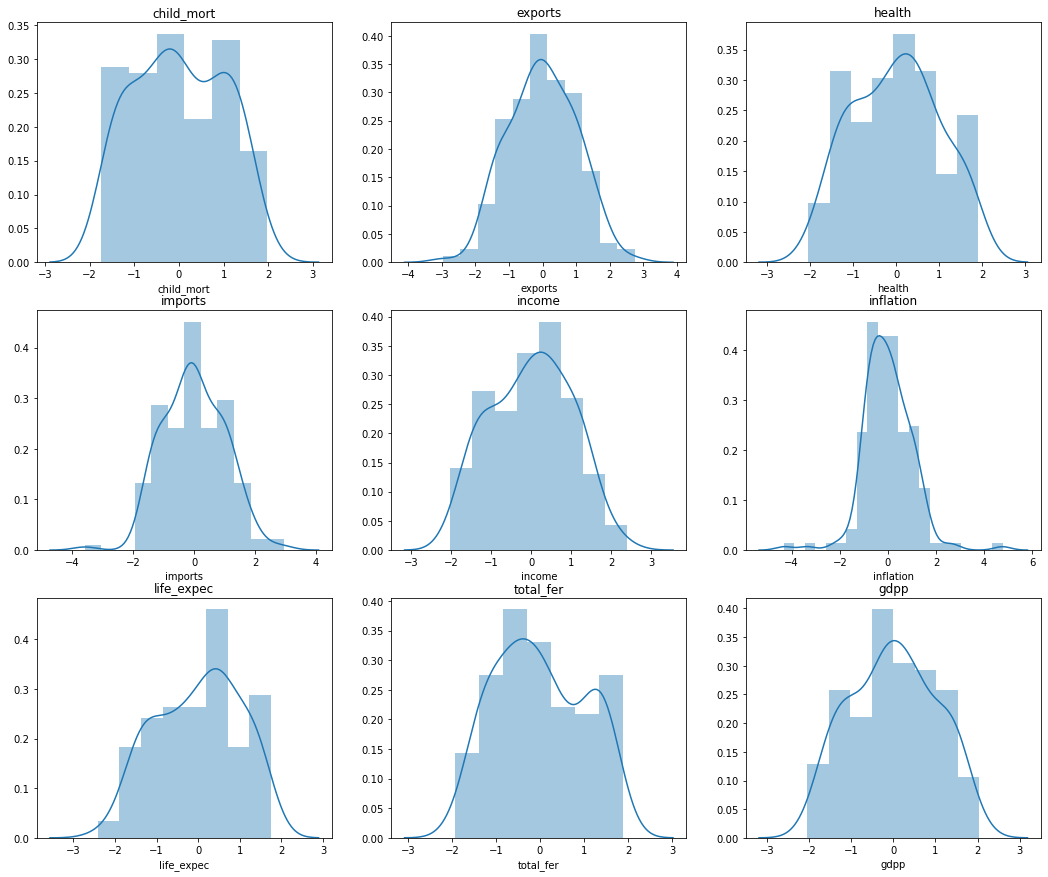

In [20]:
#Plotting all the features to visualise and look their distributions
plt.figure(figsize=(18,15))
features = transformed_data.columns
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(transformed_data[i[1]])
    plt.title(str(i[1]))

In [21]:
#skewness of each feature after transforming the data
transformed_data.skew()

child_mort    0.015754
exports      -0.011631
health        0.028684
imports       0.008375
income       -0.035867
inflation     0.182506
life_expec   -0.184956
total_fer     0.136536
gdpp          0.001120
dtype: float64

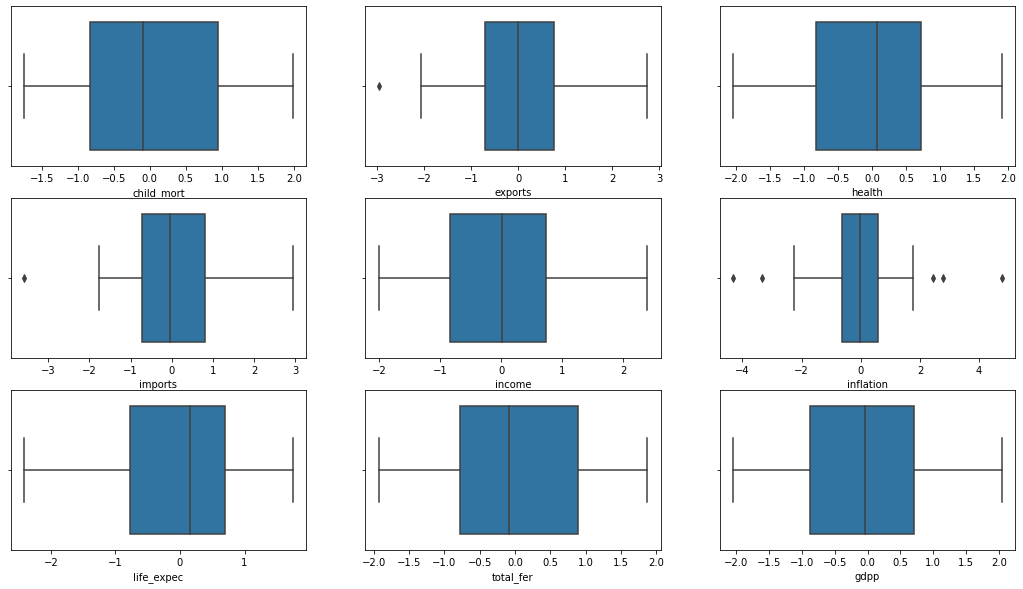

In [22]:
# Chceking the Outlier values

plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(transformed_data.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(transformed_data.exports)
plt.subplot(3, 3, 3)
sns.boxplot(transformed_data.health)
plt.subplot(3, 3, 4)
sns.boxplot(transformed_data.imports)
plt.subplot(3, 3, 5)
sns.boxplot(transformed_data.income)
plt.subplot(3, 3, 6)
sns.boxplot(transformed_data.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(transformed_data.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(transformed_data.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(transformed_data.gdpp)
plt.show()

**Insights:**
- There seemes to be outliers in every single variable. This is a very delicate situation in terms of Business problem statement & Clustering analysis. 
- If we apply outlier treatment by Deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid. 
- If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the centroid (K-Means) of the cluster. 
- After considering all these scenarios and the business call, I have decided to use **SOFT CAPPING** (less number of observations; 167): 
    
  1. to the lower range outliers for 'child_mort','inflation','total_fer' as  the values of these variables need to be high to be eligible for  financial aid and  
  2. to the upper range outliers to the rest of the variables as values of these variables for the countries need to be less to be eligible for financial aid from the NGO. 

## Outlier Treatment

In [23]:
#Getting Lower Control Limit value for variables  'child_mort','inflation' and 'total_fer' and upper Control Limit for other varaiables
upper= transformed_data.quantile(0.99)
lower= transformed_data.quantile(0.01)
print("Upper Control Limits")
print(round(upper),2)
print()
print("Lower Control Limits")
print(round(lower),2)

Upper Control Limits
child_mort    2.0
exports       2.0
health        2.0
imports       2.0
income        2.0
inflation     3.0
life_expec    2.0
total_fer     2.0
gdpp          2.0
Name: 0.99, dtype: float64 2

Lower Control Limits
child_mort   -2.0
exports      -2.0
health       -2.0
imports      -2.0
income       -2.0
inflation    -3.0
life_expec   -2.0
total_fer    -2.0
gdpp         -2.0
Name: 0.01, dtype: float64 2


In [24]:
transformed_data["child_mort"] = transformed_data["child_mort"].map(lambda x: 3 if x < 3 else x)
transformed_data["inflation"] = transformed_data["inflation"].map(lambda x:-2.0 if x < -2.0 else x)
transformed_data["total_fer"] = transformed_data["total_fer"].map(lambda x: 1.0 if x < 1.0 else x)
transformed_data["exports"] = transformed_data["exports"].map(lambda x: 64794.0 if x > 64794.0 else x)
transformed_data["health"] = transformed_data["health"].map(lambda x: 8410.0 if x > 8410.0 else x)
transformed_data["imports"] = transformed_data["imports"].map(lambda x: 55371.0 if x > 55371.0 else x)
transformed_data["income"] = transformed_data["income"].map(lambda x: 84374.0 if x > 84374.0 else x)
transformed_data["life_expec"] = transformed_data["life_expec"].map(lambda x: 82 if x > 82 else x)
transformed_data["gdpp"] = transformed_data["gdpp"].map(lambda x: 79088.0 if x >79088.0 else x)


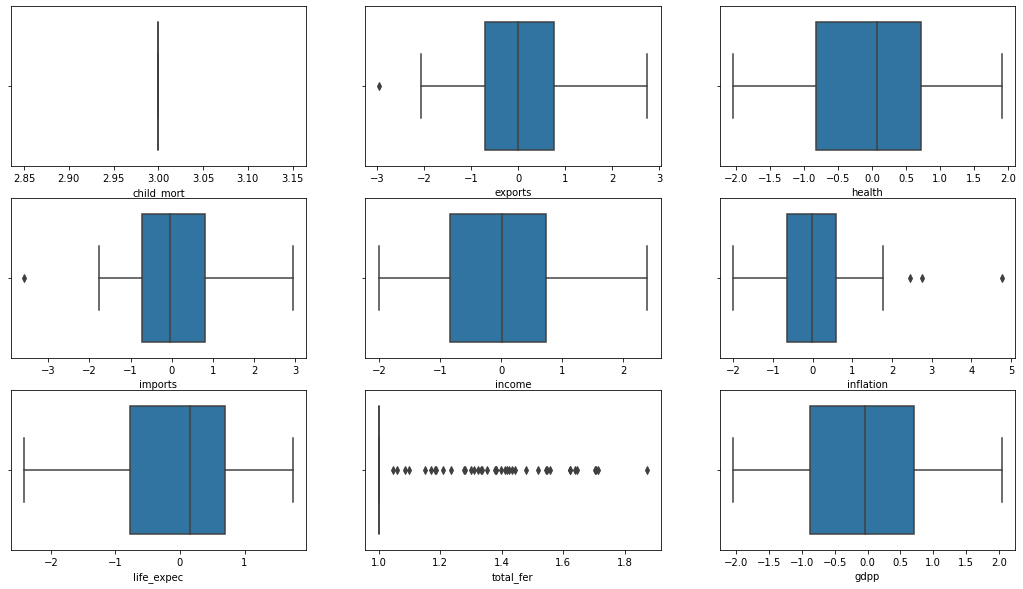

In [25]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(transformed_data.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(transformed_data.exports)
plt.subplot(3, 3, 3)
sns.boxplot(transformed_data.health)
plt.subplot(3, 3, 4)
sns.boxplot(transformed_data.imports)
plt.subplot(3, 3, 5)
sns.boxplot(transformed_data.income)
plt.subplot(3, 3, 6)
sns.boxplot(transformed_data.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(transformed_data.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(transformed_data.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(transformed_data.gdpp)
plt.show()

## Exploratory Data Analysis

### Visualising Distribution
- Let's make a pairplot of all the numeric variables


In [26]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

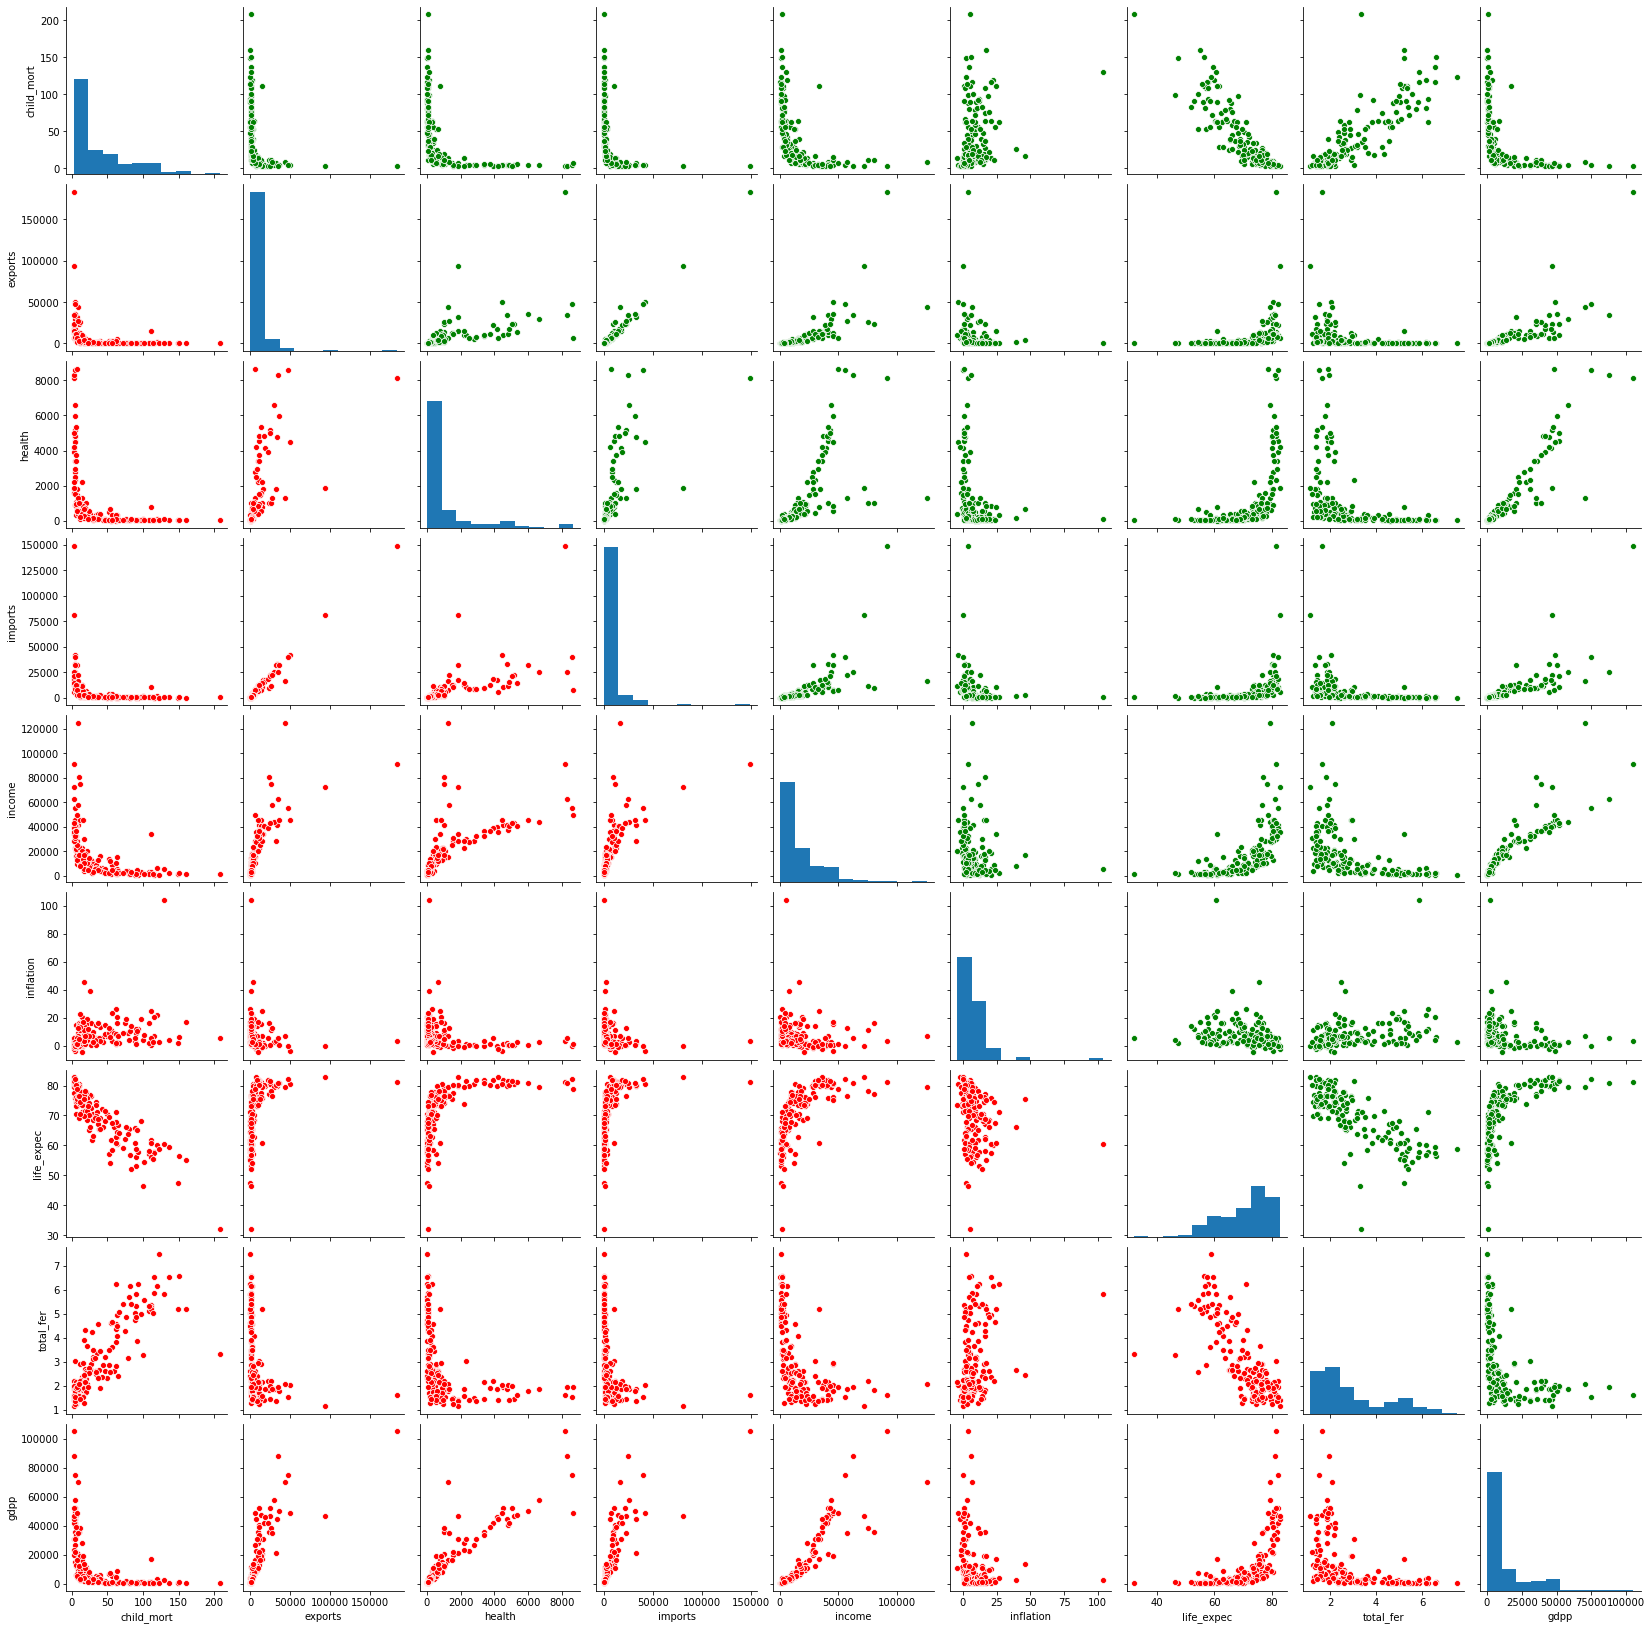

In [27]:
# Let's make a paiplot of teh ngo dataframe
ngo_data = data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

g = sns.PairGrid(ngo_data)
g.map_upper(sns.scatterplot,color='green')
g.map_lower(sns.scatterplot, color='red')
g.map_diag(plt.hist)

plt.show()


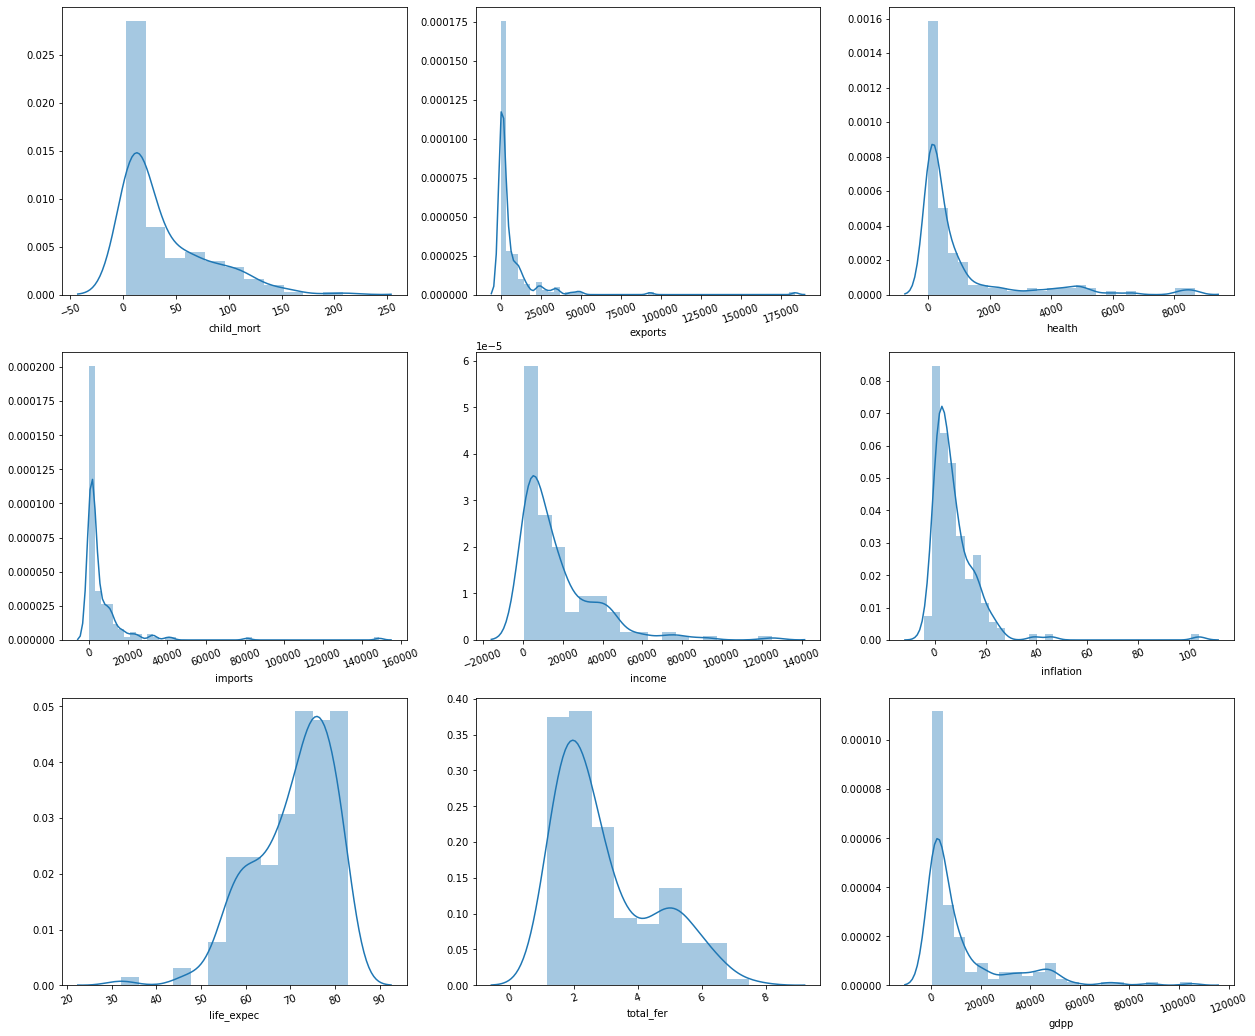

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(ngo_data[i[1]])
    plt.xticks(rotation=20)

### Insight 
- Most of the data point are 'NOT Normally' distributed. 
- Their variance are also differernt. 
- Their range are also differnt All the above points indicates the need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

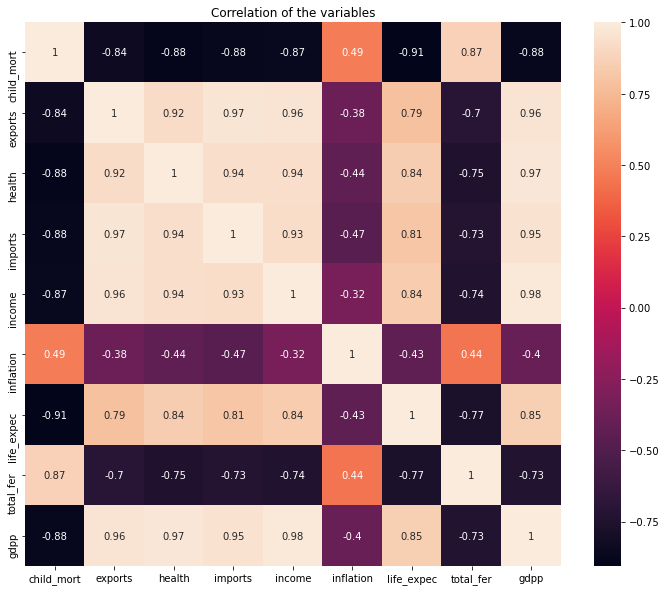

In [29]:
# Plotting heat map to see the correlation of the dataset

# setting figure size and inline

%matplotlib inline 
plt.figure(figsize=(12,10))

# setting title

plt.title("Correlation of the variables")

# Heatmap plotting

sns.heatmap(ngo_data.corr(method='spearman'),annot=True)   # Method is used 'spearman' for monotonic

plt.show() 

**Insights:**
- It can be observed from the pairplot and heatmap that there are high correlations between some variables but it will not affect on clustering. 

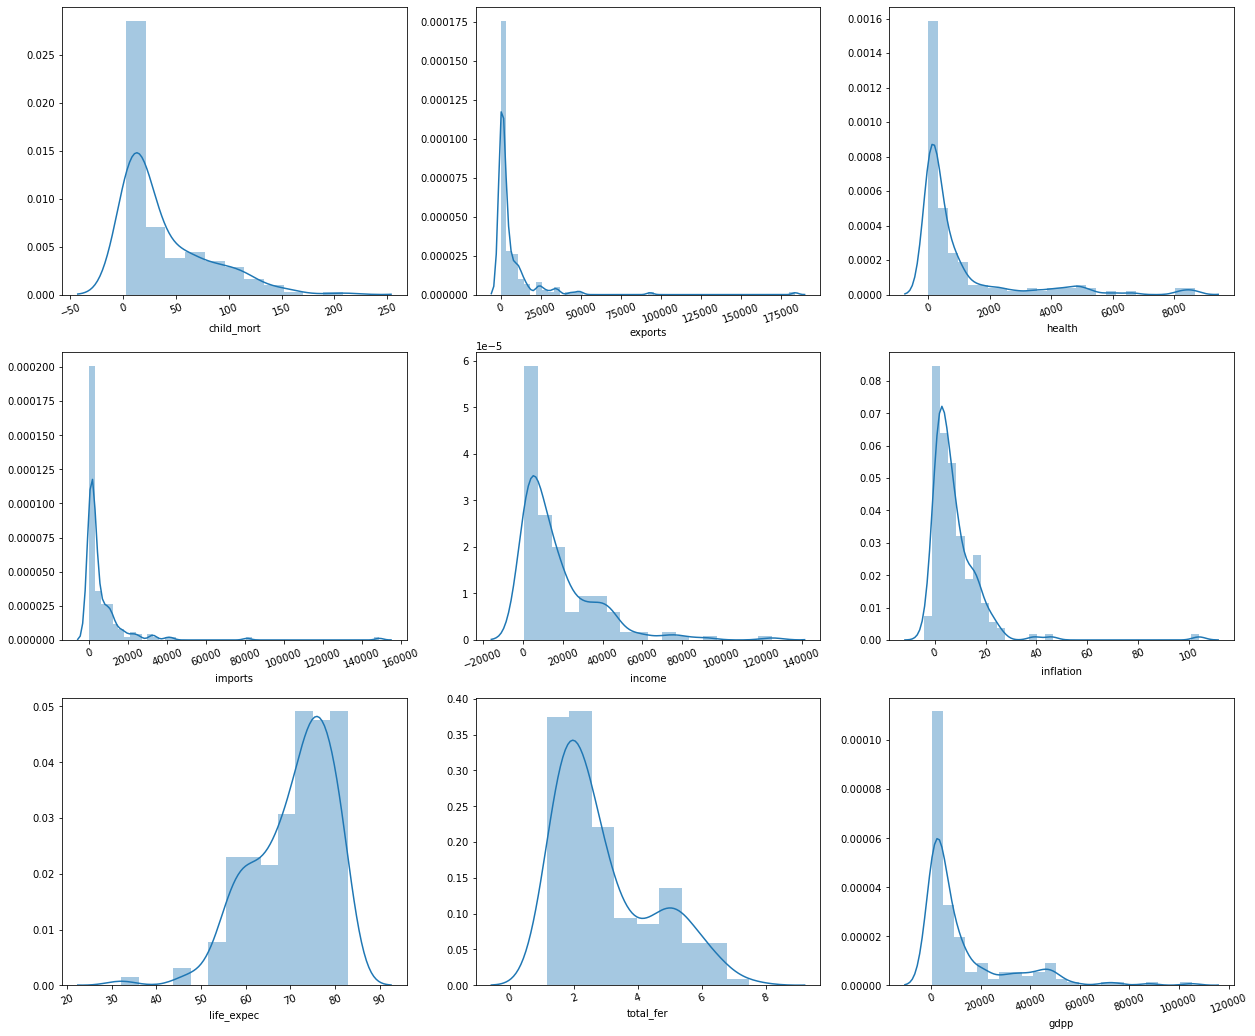

In [30]:
# Checking the distribution plots for each variable 

plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for feature in enumerate(features):
    ax = plt.subplot(3, 3, feature[0]+1)
    sns.distplot(ngo_data[feature[1]])
    plt.xticks(rotation=20)

**Insights:**
- Distribution plots are very important. We can get a rough idea of the no. of clusters from the plots peaks.
- Most of the data point are 'Not Normally' distributed. 
- Almost all the plots have more than one peaks. Like child_mort, income, export, gdpp plots are having more than 2 peaks which clearly says that there can be more than two clusters into which we can categorize the countries.
- Their ranges are also differnt. All the above points indicates the need of standardising the data before we build the model. 
- Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.


## Scaling the data
- We will use Standardisation method for scaling the data.

In [31]:
ngo_data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [32]:
# New dataframe with only Numeric variables, for scaling

df_new=ngo_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()

In [33]:
# dataframe containing only the numerical variables 

df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0 KB


In [35]:
df_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [36]:
# rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_new)
df_scaled.shape

(167, 9)

In [37]:
df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [38]:
#Converting it into a dataframe

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Hopkins Statistics 

- Before we apply any clustering algorithm to the data, it's important to check whether the given data has some meaningful clusters or not. This in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is known as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.9415971161683127

**Insights:**
- Hopkins Statistic over .70 is a good score which says that the data is good for cluster analysis.
- A 'Hopkins Statistic' value close to 1 indicates that the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

## Modelling
### Hierarchical Clustering
- As mentioned in the 'Approach' section, we will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)

In [41]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


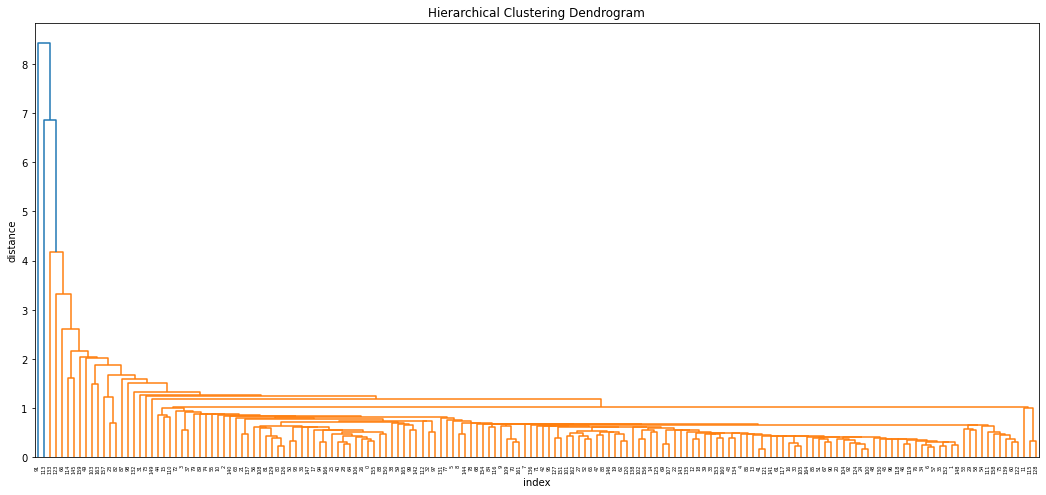

In [42]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

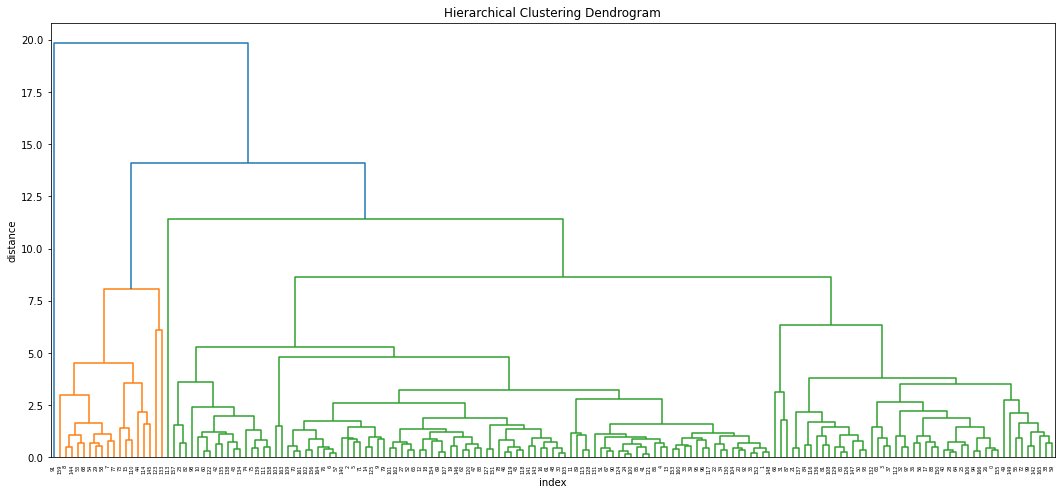

In [43]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

### NOTE: 
- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.
### First Iteration - Using 3 Clusters

In [44]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
# Create a new datafame with cluster labels to it.
df_country_h = Country_data.copy()
df_country_h['cluster_labels_3'] = cluster_labels_3
df_country_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [47]:
df_country_h.shape

(167, 11)

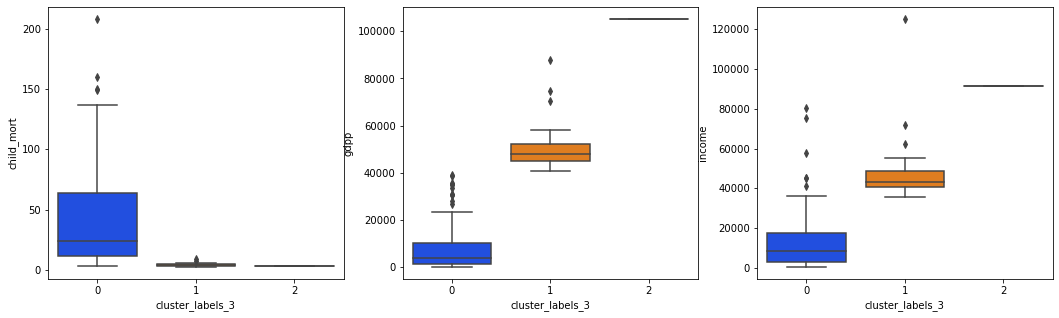

In [48]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=df_country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=df_country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=df_country_h, palette="bright")

plt.show()

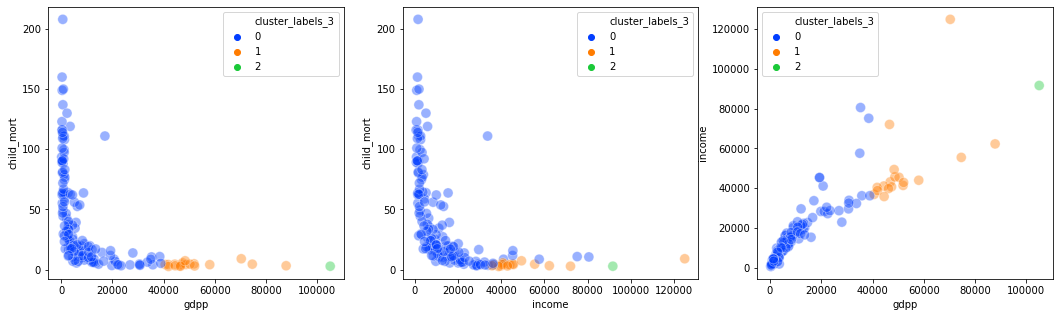

In [49]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

In [50]:
# Checking cluster count

df_country_h.cluster_labels_3.value_counts()

0    148
1     18
2      1
Name: cluster_labels_3, dtype: int64

In [51]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_country_h[df_country_h['cluster_labels_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,2


In [52]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

df_country_h[df_country_h['cluster_labels_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1


- Cluster 1 & 2 seems to be Developed or Developing countries, so our segmentation is good in terms of all our under developed countries are segmented under cluster 0. We will further fine tune this cluster.

### Second Iteration - Using 4 Clusters

In [53]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [54]:
df_country_h['cluster_labels_4'] = cluster_labels_4

df_country_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [55]:
df_country_h.shape

(167, 12)

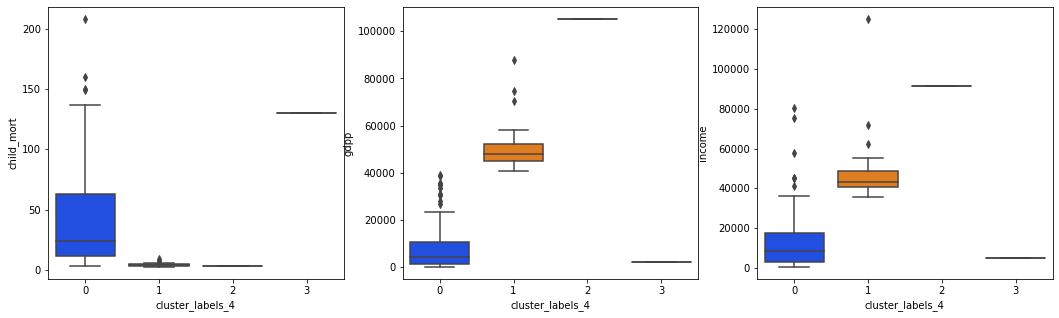

In [56]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=df_country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=df_country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=df_country_h, palette="bright")

plt.show()

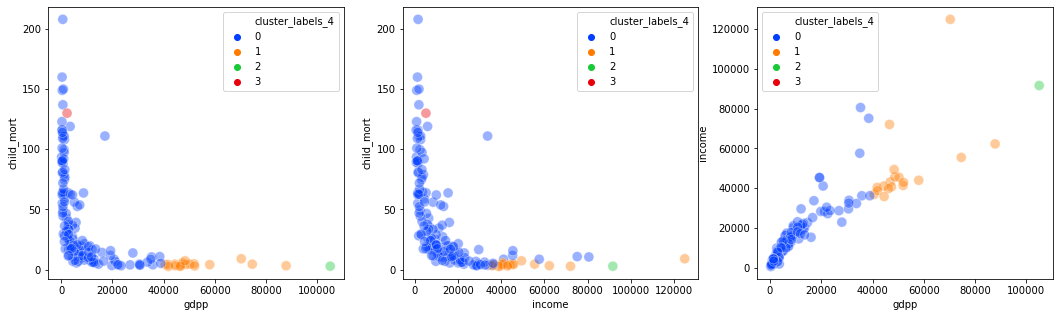

In [57]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=df_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [58]:
df_country_h.cluster_labels_4.value_counts()

0    147
1     18
3      1
2      1
Name: cluster_labels_4, dtype: int64

In [59]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_country_h[df_country_h['cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,2,2


In [60]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_country_h[df_country_h['cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,0,3


In [61]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_country_h[df_country_h['cluster_labels_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1,1


### INSIGHT : 
From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigera could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. We will further validate with other methods below.

### Interpreting the Clusters from Hierarchical model

In [62]:
#New dataframe for group by & analysis
df_country_h_analysis =  df_country_h.groupby(['cluster_labels_3']).mean()
df_country_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4
cluster_labels_3,,,,,,,,,,
0,42.630405,38.427696,6.423041,46.114634,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,55.716667,9.991111,47.983333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,175.000000,7.770000,142.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [63]:
# Creating a new field for count of observations in each cluster
df_country_h_analysis['Observations']=df_country_h[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
df_country_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations
cluster_labels_3,,,,,,,,,,,
0,42.630405,38.427696,6.423041,46.114634,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,55.716667,9.991111,47.983333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,175.000000,7.770000,142.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [64]:
# Creating a new field for proportion of observations in each cluster
df_country_h_analysis['Proportion']=round(df_country_h_analysis['Observations']/df_country_h_analysis['Observations'].sum(),2)
df_country_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations,Proportion
cluster_labels_3,,,,,,,,,,,,
0,42.630405,38.427696,6.423041,46.114634,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,55.716667,9.991111,47.983333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18,0.11
2,2.800000,175.000000,7.770000,142.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1,0.01


<Figure size 576x360 with 0 Axes>

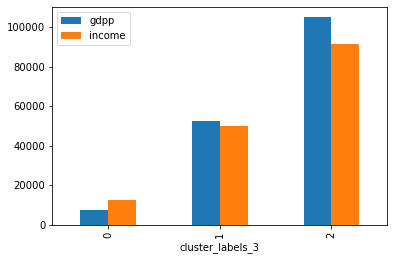

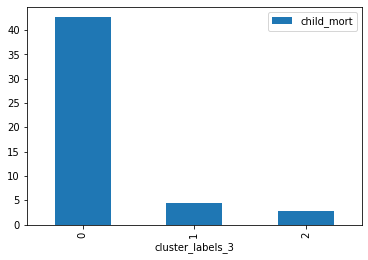

In [65]:

plt.figure(figsize=(8, 5))
df_country_h_plot1=df_country_h[['cluster_labels_3','gdpp','income']].copy()
df_country_h_plot1=df_country_h_plot1.groupby('cluster_labels_3').mean()
df_country_h_plot1.plot.bar()

df_country_h_plot2=df_country_h[['cluster_labels_3','child_mort']].copy()
df_country_h_plot2=df_country_h_plot2.groupby('cluster_labels_3').mean()
df_country_h_plot2.plot.bar()
plt.show()

#### Interpretation of Clusters:
Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be. 

### Finding the Optimal Number of Clusters
#### SSD (Elbow Curve)

In [66]:
#Checking the dataframe
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [67]:
df_scaled.shape

(167, 9)

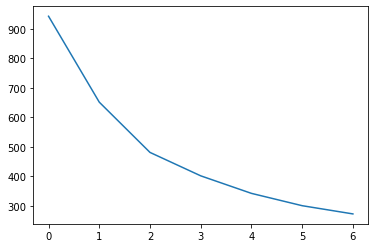

In [68]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

### Silhouette Analysis
#### silhouette score=p−q/max(p,q)
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [69]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3174156417229116
For n_clusters=7, the silhouette score is 0.3070091897548281
For n_clusters=8, the silhouette score is 0.3072022455395681


### INSIGHT : 
- From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used. We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.

In [70]:
# assign cluster labels
df_scaled['cluster_labels'] = cluster_labels
df_scaled['country']=df_country_h['country']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2,Afghanistan
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,Albania
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,Algeria
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2,Angola
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,Antigua and Barbuda


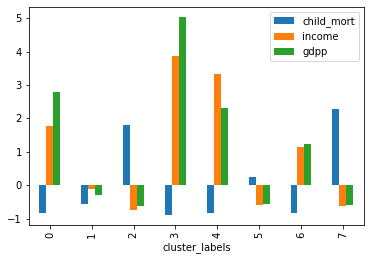

In [71]:
df_scaled.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis =1).groupby('cluster_labels').mean().plot(kind='bar')

In [72]:
df_final=df_scaled[df_scaled['cluster_labels']==0].sort_values(by=["gdpp",'child_mort', 'income'], ascending=[True, False, True]) 

In [73]:
df_final.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
159,-0.770246,-0.079186,4.235432,0.072194,1.678193,-0.622623,0.918548,-0.674457,1.939167,0,United States
110,-0.839884,1.606886,2.744402,1.731981,1.475282,-0.657921,1.144116,-0.767215,2.043141,0,Netherlands
44,-0.849832,1.220390,3.093120,1.274973,1.397240,-0.432852,1.008775,-0.714211,2.464511,0,Denmark
145,-0.839884,2.250190,4.188327,2.261821,1.995566,-0.708305,1.313292,-0.946105,3.372918,0,Switzerland
114,-0.872216,1.531027,4.046034,1.256905,2.349360,-0.173815,1.177951,-0.661206,4.095266,0,Norway


#### Based on the Hierarchical analysis, below are the top 5 countries that are need of direct aid
    1.Burundi
    2.Liberia
    3.Congo,Dem. Rep.
    4.Niger
    5.Sierra Leone

## K-Means Clustering

### First Iteration - Using 3 Clusters¶

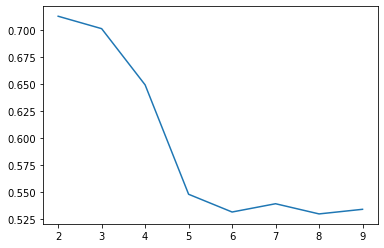

In [74]:
## silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(df_new)
    ss.append([k, silhouette_score(df_new,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

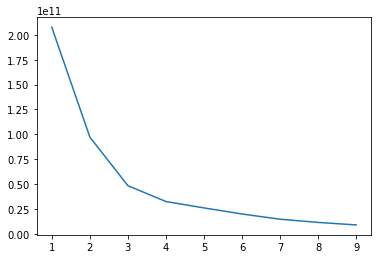

In [75]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df_new)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

### By looking into silhouette and elbow curve choosing k = 3

In [76]:
# Lets perfom K means using K=3
kmean = KMeans (n_clusters=3, max_iter = 50, random_state=50)
kmean.fit(df_new)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [77]:
kmeans.labels_

array([0, 0, 6, 0, 6, 6, 0, 4, 4, 6, 1, 1, 0, 6, 6, 4, 0, 0, 0, 0, 0, 6,
       6, 8, 6, 0, 0, 0, 0, 4, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 6, 1, 1,
       4, 6, 0, 0, 0, 1, 0, 1, 0, 4, 4, 6, 0, 0, 4, 0, 1, 6, 0, 0, 0, 0,
       0, 6, 4, 0, 0, 6, 6, 2, 1, 1, 0, 4, 0, 6, 0, 0, 8, 0, 0, 6, 6, 0,
       0, 1, 6, 3, 6, 0, 0, 6, 6, 0, 1, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       4, 1, 0, 0, 2, 1, 0, 6, 0, 0, 0, 6, 1, 5, 6, 6, 0, 0, 1, 0, 6, 6,
       0, 7, 1, 1, 0, 6, 1, 1, 0, 6, 0, 6, 4, 2, 0, 0, 6, 0, 0, 0, 0, 6,
       0, 0, 0, 4, 4, 4, 6, 0, 0, 6, 0, 0, 0])

In [78]:
## Let's make a copy of our original data before using it for analysis
df_org = Country_data.copy()

In [79]:
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [80]:
col=Country_data.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [81]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([Country_data.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [82]:
# Cross check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
clusterID     0
dtype: int64

In [83]:
# checking the count of observations for each cluster

df_km['clusterID'].value_counts()

0    129
2     36
1      2
Name: clusterID, dtype: int64

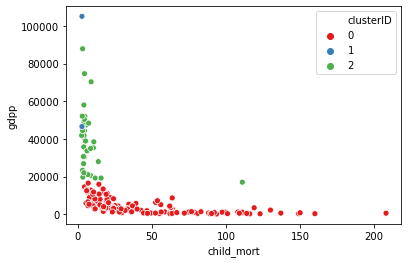

In [84]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = df_km, palette='Set1')
plt.show()

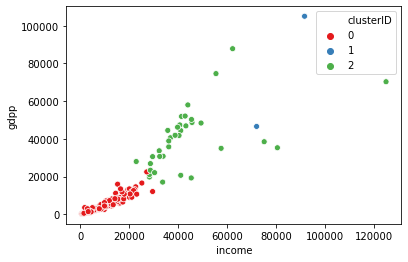

In [85]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = df_km, palette='Set1')
plt.show()

### By choosing K = 4 

In [86]:
kmean1 = KMeans (n_clusters=4, max_iter = 50, random_state=50)
kmean1.fit(df_new)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [87]:
df_k = pd.concat([Country_data.reset_index().drop('index', axis = 1), pd.Series(kmean1.labels_)], axis = 1)
df_k.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
df_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [88]:
# checking the count of observations for each cluster

df_k['clusterID'].value_counts()

0    125
3     29
1     12
2      1
Name: clusterID, dtype: int64

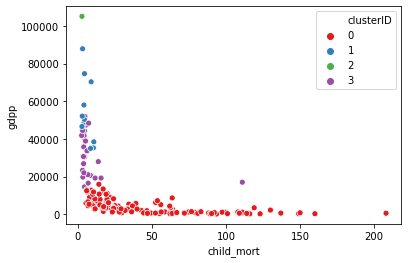

In [89]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = df_k, palette='Set1')
plt.show()

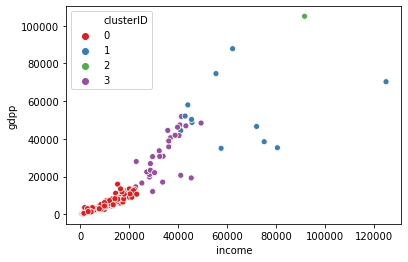

In [90]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = df_k, palette='Set1')
plt.show()

### As we can see when we consider k=4 there is no much dissimilarity or seperation in data. Hence choosing K=3

## Cluster Profiling

In [91]:
# Reading the data frame
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [92]:
# dropping the unncecessary columns and grouping according to clusterId's

df_km.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean()

,child_mort,income,gdpp
clusterID,,,
0,47.052713,8713.666667,4578.403101
1,2.800000,81900.000000,75800.000000
2,8.769444,43758.333333,39522.222222


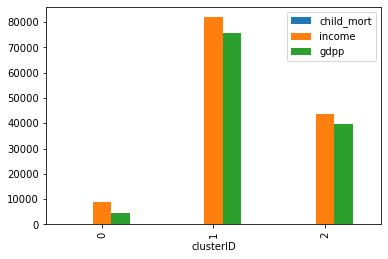

In [93]:
df_km.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean().plot(kind='bar')
plt.show()

### As we can see cluster 2 has low income and gdpp we need to aid these countries

## Decision Making on the final approach

In [94]:
df_fin=df_km[df_km['clusterID']==0].sort_values(by=["gdpp",'child_mort','income'], ascending=[True, False,  True]) 

In [95]:
df_fin.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0


#### Based on the K-Means clustering analysis, below are the top 5 countries that are need of direct aid
    1.Burundi
    2.Liberia
    3.Congo,Dem. Rep.
    4.Niger
    5.Sierra Leone

# Conclusion

- A dataset has been provided containing 167 countries with their corresponding socio-economic  and health factors. 
- All the countries have been categorized into 3 clusters : Developed, Developing and Under Developed countries.
- Based on our Clustering Analysis,  top 10 countries from the  'Under Developed Countries' cluster has been identified and recommended which are in dire need of the Financial Aid from the Help International NGO. Recommendation has been done based on K-Means clustering with number of clusters as 3 and considering financial factor first. This output is purely based on the dataset we used and various analytical methodology we performed.

Top 10 Recommended countries which are in dire need of funds (Top 5 marked as bold):
- **Burundi**
- **Liberia**
- **Congo, Dem. Rep.**
- **Niger**
- **Sierra Leone**
- Madagascar
- Mozambique	
- Central African Republic
- Malawi	
- Eritrea

These countries have 
- low gdpp
- low income and 
- high child mortality